In [193]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-v0_8-whitegrid'])
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(True)
formatter.set_powerlimits((-3, 2))

In [194]:
sys.path.append("../src")

In [195]:
from utils import start_experiments, ExportConfig, ExperimentSetup

# Experiments analysis

Comparison of the different experiments in NA and STG:
- Satellite + BGCArgo:
  - Comparison between OLCI & GlobColour
    - 50 Meters
    - 250 Meters
- Satellite:
  - Comparison between OLCI & OLCI+IOPs
    - 50 meters 

In [196]:
ExperimentSetup.ALL_REGIONS

['NA', 'STG']

In [197]:
colors = {'NA': 'g', 'STG': '#1f77b4'}

## Satellite + BGCArgo

In [198]:
sat_bgc_experiments = ["GCGOBGC","S3OLCIBGC"]

### 50 Meters

In [199]:
r2_50 = pd.DataFrame()
mae_50 = pd.DataFrame()
bias_50 = pd.DataFrame()

In [200]:
metric_targets_50 = {
    "R2": r2_50,
    "MAE": mae_50,
    "Bias": bias_50
}

In [201]:
# Select depth
depth = '50'

In [202]:
for region in ExperimentSetup.ALL_REGIONS:
    for experiment in sat_bgc_experiments:

        # Metrics file
        metrics_file = f"../results/{region}/{depth}/{experiment}/Model/Metrics/{region}_{depth}_{experiment}_depth_metrics.csv"
        metrics_df = pd.read_csv(metrics_file, index_col=0, header=None).iloc[1:,:]

        for metric in ["R2", "MAE", "Bias"]:
            series = metrics_df.loc[metric]
            series.name = f"{region}_{experiment}"
            metric_targets_50[metric] = pd.concat([metric_targets_50[metric], series], axis=1)

In [203]:
# Assign updated DataFrames
r2_50 = metric_targets_50["R2"]
mae_50 = metric_targets_50["MAE"]
bias_50 = metric_targets_50["Bias"]

In [204]:
# Define som viz parameters based on the experiment
depth_value = int(depth) 
depth_range = np.arange(1, 52, 2)  
yticks = (-1,-11,-21,-31,-41,-51)

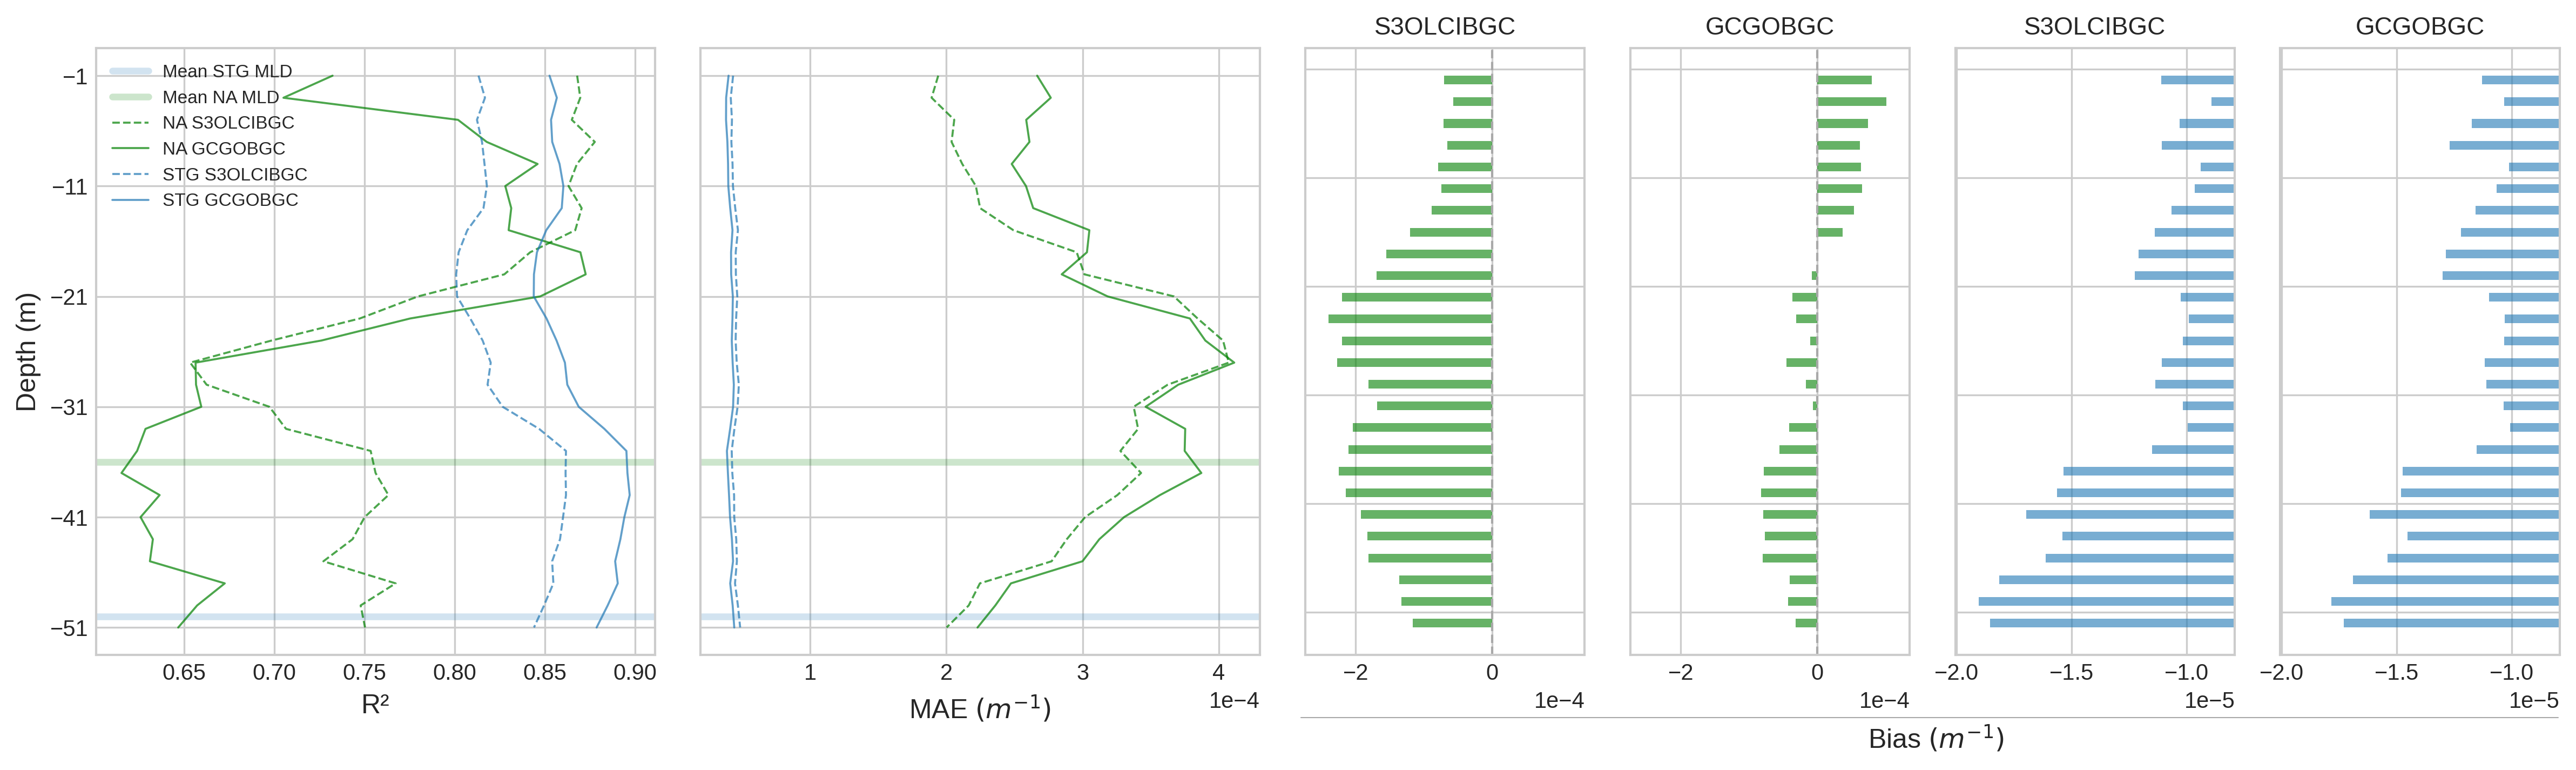

In [205]:
fig, axes = plt.subplots(1, 6, figsize=(16, 5), dpi=300, gridspec_kw={'width_ratios': [1, 1, 0.5, 0.5,0.5, 0.5]}, sharey=False)

# --- R² Plot ---
ax = axes[0]
ax.axhline(y=-50, color=colors['STG'], linewidth=3, alpha=0.2, label='Mean STG MLD')
ax.axhline(y=-36, color=colors['NA'], linewidth=3, alpha=0.2,label='Mean NA MLD')

ax.plot(r2_50["NA_S3OLCIBGC"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="--", linewidth=0.9, label="NA S3OLCIBGC")
ax.plot(r2_50["NA_GCGOBGC"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="-", linewidth=0.9, label="NA GCGOBGC")
ax.plot(r2_50["STG_S3OLCIBGC"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="--", linewidth=0.9, label="STG S3OLCIBGC")
ax.plot(r2_50["STG_GCGOBGC"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="-", linewidth=0.9, label="STG GCGOBGC")

ax.set_xlabel("R\u00B2", fontsize=12)
ax.set_ylabel("Depth (m)", fontsize=12)
ax.set_yticks(yticks)
ax.tick_params(labelsize=10)
ax.legend(fontsize=8)

# --- MAE Plot ---
ax = axes[1]
ax.axhline(y=-50, color=colors['STG'], linewidth=3, alpha=0.2)
ax.axhline(y=-36, color=colors['NA'], linewidth=3, alpha=0.2)
ax.set_yticklabels([])
ax.plot(mae_50["NA_S3OLCIBGC"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="--", linewidth=0.9)
ax.plot(mae_50["NA_GCGOBGC"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="-", linewidth=0.9)
ax.plot(mae_50["STG_S3OLCIBGC"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="--", linewidth=0.9)
ax.plot(mae_50["STG_GCGOBGC"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="-", linewidth=0.9)
ax.set_yticks(yticks)
ax.set_xlabel("MAE $(m^{-1})$", fontsize=12)
ax.tick_params(labelsize=10)
axes[1].xaxis.set_major_formatter(formatter)

ax = axes[2]
ax.barh(depth_range, bias_50["NA_S3OLCIBGC"], color=colors['NA'], alpha=0.6)
#ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.invert_yaxis()
ax.axvline(x=0, color='darkgrey', linestyle='--', linewidth=1)
ax.tick_params(labelsize=10)
ax.set_title("S3OLCIBGC", fontsize=11)
axes[2].xaxis.set_major_formatter(formatter)

ax = axes[3]
ax.barh(depth_range, bias_50["NA_GCGOBGC"], color=colors['NA'], alpha=0.6)
#ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.invert_yaxis()
ax.axvline(x=0, color='darkgrey', linestyle='--', linewidth=1)
ax.tick_params(labelsize=10)
ax.set_title("GCGOBGC", fontsize=11)
axes[3].xaxis.set_major_formatter(formatter)

ax = axes[4]
ax.barh(depth_range, bias_50["STG_S3OLCIBGC"], color=colors['STG'], alpha=0.6)
#ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.invert_yaxis()
ax.axvline(x=0, color='darkgrey', linestyle='--', linewidth=1)
ax.tick_params(labelsize=10)
ax.set_title("S3OLCIBGC", fontsize=11)

ax = axes[5]
ax.barh(depth_range, bias_50["STG_GCGOBGC"], color=colors['STG'], alpha=0.6)
#ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.invert_yaxis()
ax.axvline(x=0, color='darkgrey', linestyle='--', linewidth=1)
ax.tick_params(labelsize=10)
ax.set_title("GCGOBGC", fontsize=11)


na_bias_values = np.concatenate([
    bias_50["NA_S3OLCIBGC"],
    bias_50["NA_GCGOBGC"]
])
na_bias_min = na_bias_values.min()
na_bias_max = na_bias_values.max()

# Add small margin
margin = 0.1 * (na_bias_max - na_bias_min)
xlim_na = (na_bias_min - margin, na_bias_max + margin)

axes[2].set_xlim(xlim_na)
axes[3].set_xlim(xlim_na)

stg_bias_values = np.concatenate([
    bias_50["STG_S3OLCIBGC"],
    bias_50["STG_GCGOBGC"]
])
stg_bias_min = stg_bias_values.min()
stg_bias_max = stg_bias_values.max()

margin = 0.1 * (stg_bias_max - stg_bias_min)
xlim_stg = (stg_bias_min - margin, stg_bias_max + margin)

axes[4].set_xlim(xlim_stg)
axes[5].set_xlim(xlim_stg)

fig.supxlabel('Bias $(m^{-1})$', fontsize=12, x=0.75, y = 0.060) 

line_y = 0.105  # same y as supxlabel
line_x_start = 0.505  # adjust based on figure layout (left side of bias plots)
line_x_end = 0.99   # adjust based on figure layout (right side of bias plots)

# Use Figure coordinates to draw a horizontal line
fig.add_artist(plt.Line2D([line_x_start, line_x_end], [line_y, line_y],
                          transform=fig.transFigure,
                          color='darkgrey', linewidth=0.5))

plt.tight_layout()
plt.savefig(f"../results/Comparisons/{depth}/Comparison_{depth}_R2_MAE_Bias_sat_bgc.pdf")
plt.show()

### 250 Meters

In [206]:
r2_250 = pd.DataFrame()
mae_250 = pd.DataFrame()
bias_250 = pd.DataFrame()

In [207]:
metric_targets_250 = {
    "R2": r2_250,
    "MAE": mae_250,
    "Bias": bias_250
}

In [208]:
# Select depth
depth = '250'

In [209]:
for region in ExperimentSetup.ALL_REGIONS:
    for experiment in sat_bgc_experiments:

        # Metrics file
        metrics_file = f"../results/{region}/{depth}/{experiment}/Model/Metrics/{region}_{depth}_{experiment}_depth_metrics.csv"
        metrics_df = pd.read_csv(metrics_file, index_col=0, header=None).iloc[1:,:]

        for metric in ["R2", "MAE", "Bias"]:
            series = metrics_df.loc[metric]
            series.name = f"{region}_{experiment}"
            metric_targets_250[metric] = pd.concat([metric_targets_250[metric], series], axis=1)

In [210]:
# Assign updated DataFrames
r2_250 = metric_targets_250["R2"]
mae_250 = metric_targets_250["MAE"]
bias_250 = metric_targets_250["Bias"]

In [211]:
# Define som viz parameters based on the experiment
depth_value = int(depth) 
depth_range = np.arange(1, 253, 2)  
yticks = (-1,-51,-101,-151,-201,-250)

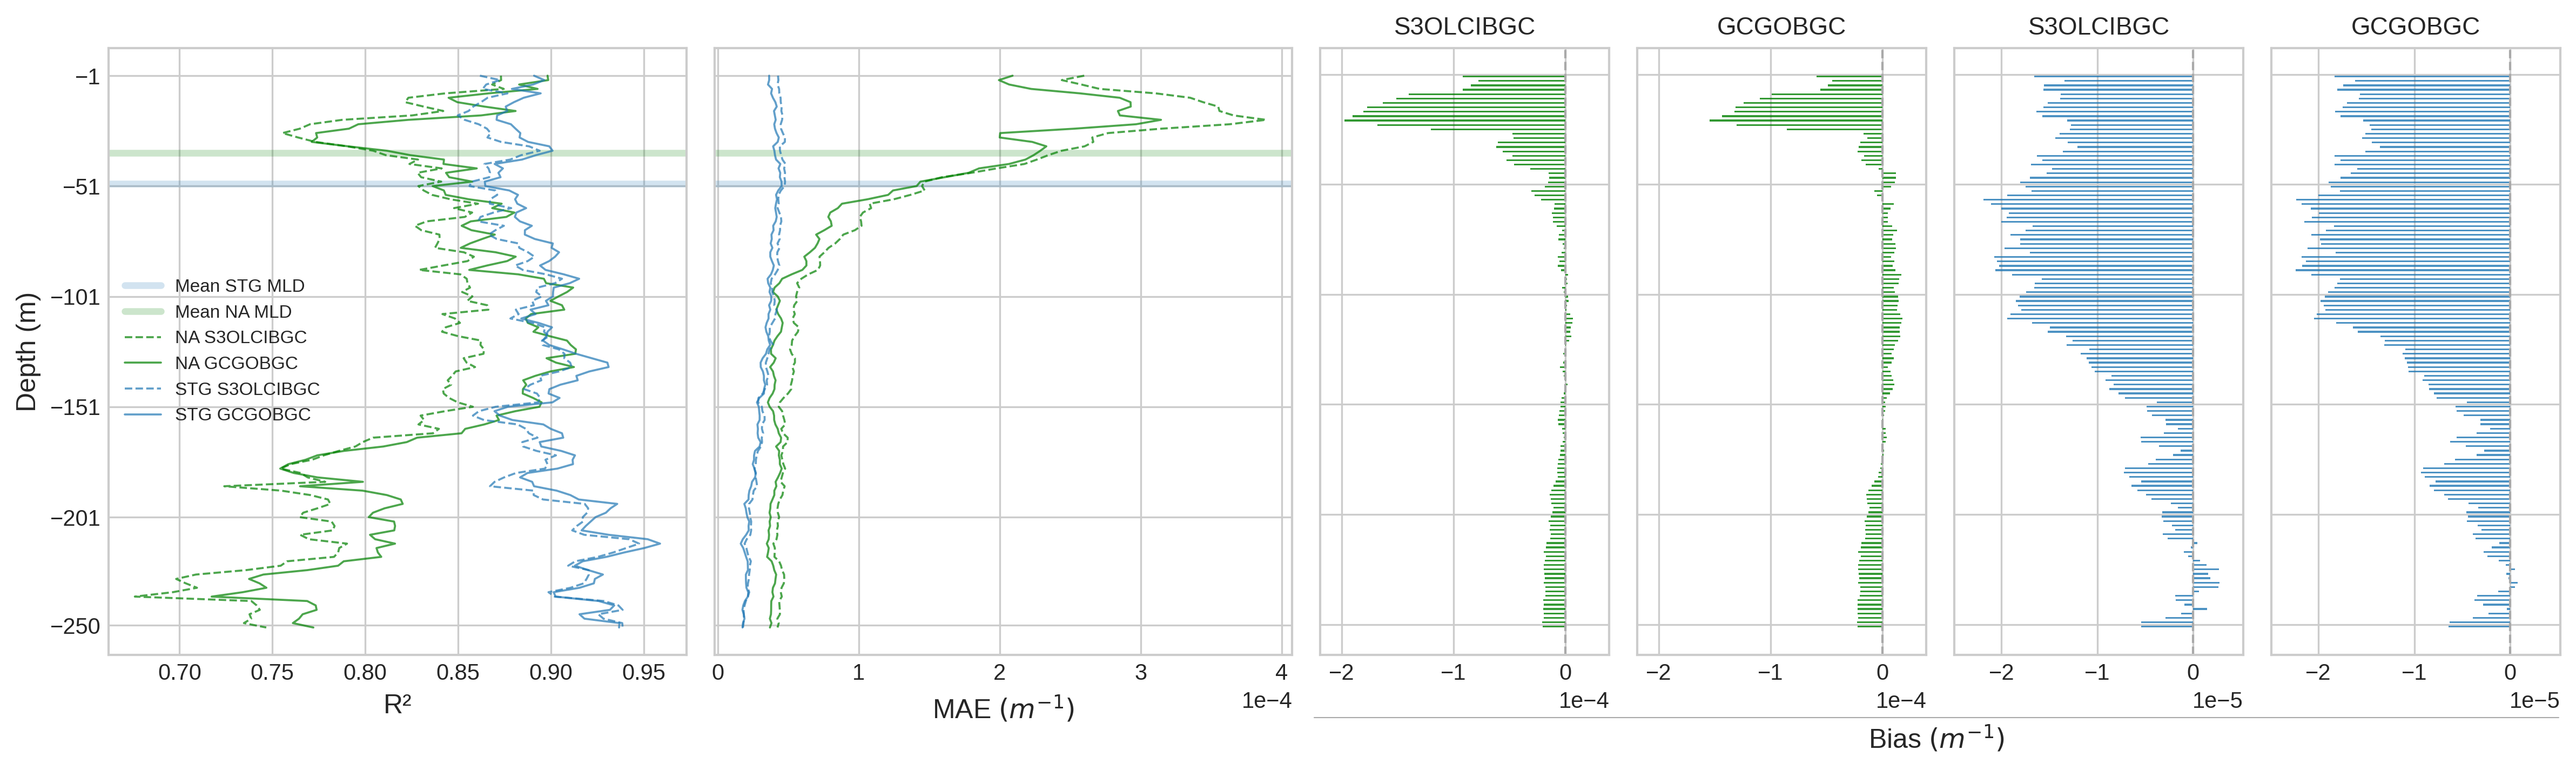

In [212]:
fig, axes = plt.subplots(1, 6, figsize=(16, 5), dpi=300, gridspec_kw={'width_ratios': [1, 1, 0.5, 0.5,0.5, 0.5]}, sharey=False)

# --- R² Plot ---
ax = axes[0]
ax.axhline(y=-50, color=colors['STG'], linewidth=3, alpha=0.2, label='Mean STG MLD')
ax.axhline(y=-36, color=colors['NA'], linewidth=3, alpha=0.2,label='Mean NA MLD')

ax.plot(r2_250["NA_S3OLCIBGC"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="--", linewidth=0.9, label="NA S3OLCIBGC")
ax.plot(r2_250["NA_GCGOBGC"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="-", linewidth=0.9, label="NA GCGOBGC")
ax.plot(r2_250["STG_S3OLCIBGC"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="--", linewidth=0.9, label="STG S3OLCIBGC")
ax.plot(r2_250["STG_GCGOBGC"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="-", linewidth=0.9, label="STG GCGOBGC")

ax.set_xlabel("R\u00B2", fontsize=12)
ax.set_ylabel("Depth (m)", fontsize=12)
ax.set_yticks(yticks)
ax.tick_params(labelsize=10)
ax.legend(fontsize=8)

# --- MAE Plot ---
ax = axes[1]
ax.axhline(y=-50, color=colors['STG'], linewidth=3, alpha=0.2)
ax.axhline(y=-36, color=colors['NA'], linewidth=3, alpha=0.2)
ax.set_yticklabels([])
ax.plot(mae_250["NA_S3OLCIBGC"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="--", linewidth=0.9)
ax.plot(mae_250["NA_GCGOBGC"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="-", linewidth=0.9)
ax.plot(mae_250["STG_S3OLCIBGC"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="--", linewidth=0.9)
ax.plot(mae_250["STG_GCGOBGC"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="-", linewidth=0.9)
ax.set_yticks(yticks)
ax.set_xlabel("MAE $(m^{-1})$", fontsize=12)
ax.tick_params(labelsize=10)
axes[1].xaxis.set_major_formatter(formatter)

ax = axes[2]
ax.barh(depth_range, bias_250["NA_S3OLCIBGC"], color=colors['NA'], alpha=0.8)
#ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.invert_yaxis()
ax.axvline(x=0, color='darkgrey', linestyle='--', linewidth=1)
ax.tick_params(labelsize=10)
ax.set_title("S3OLCIBGC", fontsize=11)
axes[2].xaxis.set_major_formatter(formatter)

ax = axes[3]
ax.barh(depth_range, bias_250["NA_GCGOBGC"], color=colors['NA'], alpha=0.8)
#ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.invert_yaxis()
ax.axvline(x=0, color='darkgrey', linestyle='--', linewidth=1)
ax.tick_params(labelsize=10)
ax.set_title("GCGOBGC", fontsize=11)
axes[3].xaxis.set_major_formatter(formatter)

ax = axes[4]
ax.barh(depth_range, bias_250["STG_S3OLCIBGC"], color=colors['STG'], alpha=0.8)
#ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.invert_yaxis()
ax.axvline(x=0, color='darkgrey', linestyle='--', linewidth=1)
ax.tick_params(labelsize=10)
ax.set_title("S3OLCIBGC", fontsize=11)

ax = axes[5]
ax.barh(depth_range, bias_250["STG_GCGOBGC"], color=colors['STG'], alpha=0.8)
#ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.invert_yaxis()
ax.axvline(x=0, color='darkgrey', linestyle='--', linewidth=1)
ax.tick_params(labelsize=10)
ax.set_title("GCGOBGC", fontsize=11)

na_bias_values = np.concatenate([
    bias_250["NA_S3OLCIBGC"],
    bias_250["NA_GCGOBGC"]
])
na_bias_min = na_bias_values.min()
na_bias_max = na_bias_values.max()

# Add small margin
margin = 0.1 * (na_bias_max - na_bias_min)
xlim_na = (na_bias_min - margin, na_bias_max + margin)

axes[2].set_xlim(xlim_na)
axes[3].set_xlim(xlim_na)

stg_bias_values = np.concatenate([
    bias_250["STG_S3OLCIBGC"],
    bias_250["STG_GCGOBGC"]
])
stg_bias_min = stg_bias_values.min()
stg_bias_max = stg_bias_values.max()

margin = 0.1 * (stg_bias_max - stg_bias_min)
xlim_stg = (stg_bias_min - margin, stg_bias_max + margin)

axes[4].set_xlim(xlim_stg)
axes[5].set_xlim(xlim_stg)

fig.supxlabel('Bias $(m^{-1})$', fontsize=12, x=0.75, y = 0.060) 

line_y = 0.105  # same y as supxlabel
line_x_start = 0.51  # adjust based on figure layout (left side of bias plots)
line_x_end = 0.99   # adjust based on figure layout (right side of bias plots)

# Use Figure coordinates to draw a horizontal line
fig.add_artist(plt.Line2D([line_x_start, line_x_end], [line_y, line_y],
                          transform=fig.transFigure,
                          color='darkgrey', linewidth=0.5))

plt.tight_layout()
plt.savefig(f"../results/Comparisons/{depth}/Comparison_{depth}_R2_MAE_Bias_sat_bgc.pdf")
plt.show()

## Only Satellite (50 m)

In [213]:
sat_experiments = ["S3IOPS","S3OLCI"]

In [214]:
r2_50sat = pd.DataFrame()
mae_50sat = pd.DataFrame()
bias_50sat = pd.DataFrame()

In [215]:
metric_targets_50sat = {
    "R2": r2_50sat,
    "MAE": mae_50sat,
    "Bias": bias_50sat
}

In [216]:
# Select depth
depth = '50'

In [217]:
for region in ExperimentSetup.ALL_REGIONS:
    for experiment in sat_experiments:

        # Metrics file
        metrics_file = f"../results/{region}/{depth}/{experiment}/Model/Metrics/{region}_{depth}_{experiment}_depth_metrics.csv"
        metrics_df = pd.read_csv(metrics_file, index_col=0, header=None).iloc[1:,:]

        for metric in ["R2", "MAE", "Bias"]:
            series = metrics_df.loc[metric]
            series.name = f"{region}_{experiment}"
            metric_targets_50sat[metric] = pd.concat([metric_targets_50sat[metric], series], axis=1)

In [218]:
# Assign updated DataFrames
r2_50sat = metric_targets_50sat["R2"]
mae_50sat = metric_targets_50sat["MAE"]
bias_50sat = metric_targets_50sat["Bias"]

In [219]:
# Define som viz parameters based on the experiment
depth_value = int(depth) 
depth_range = np.arange(1, 52, 2)  
yticks = (-1,-11,-21,-31,-41,-51)

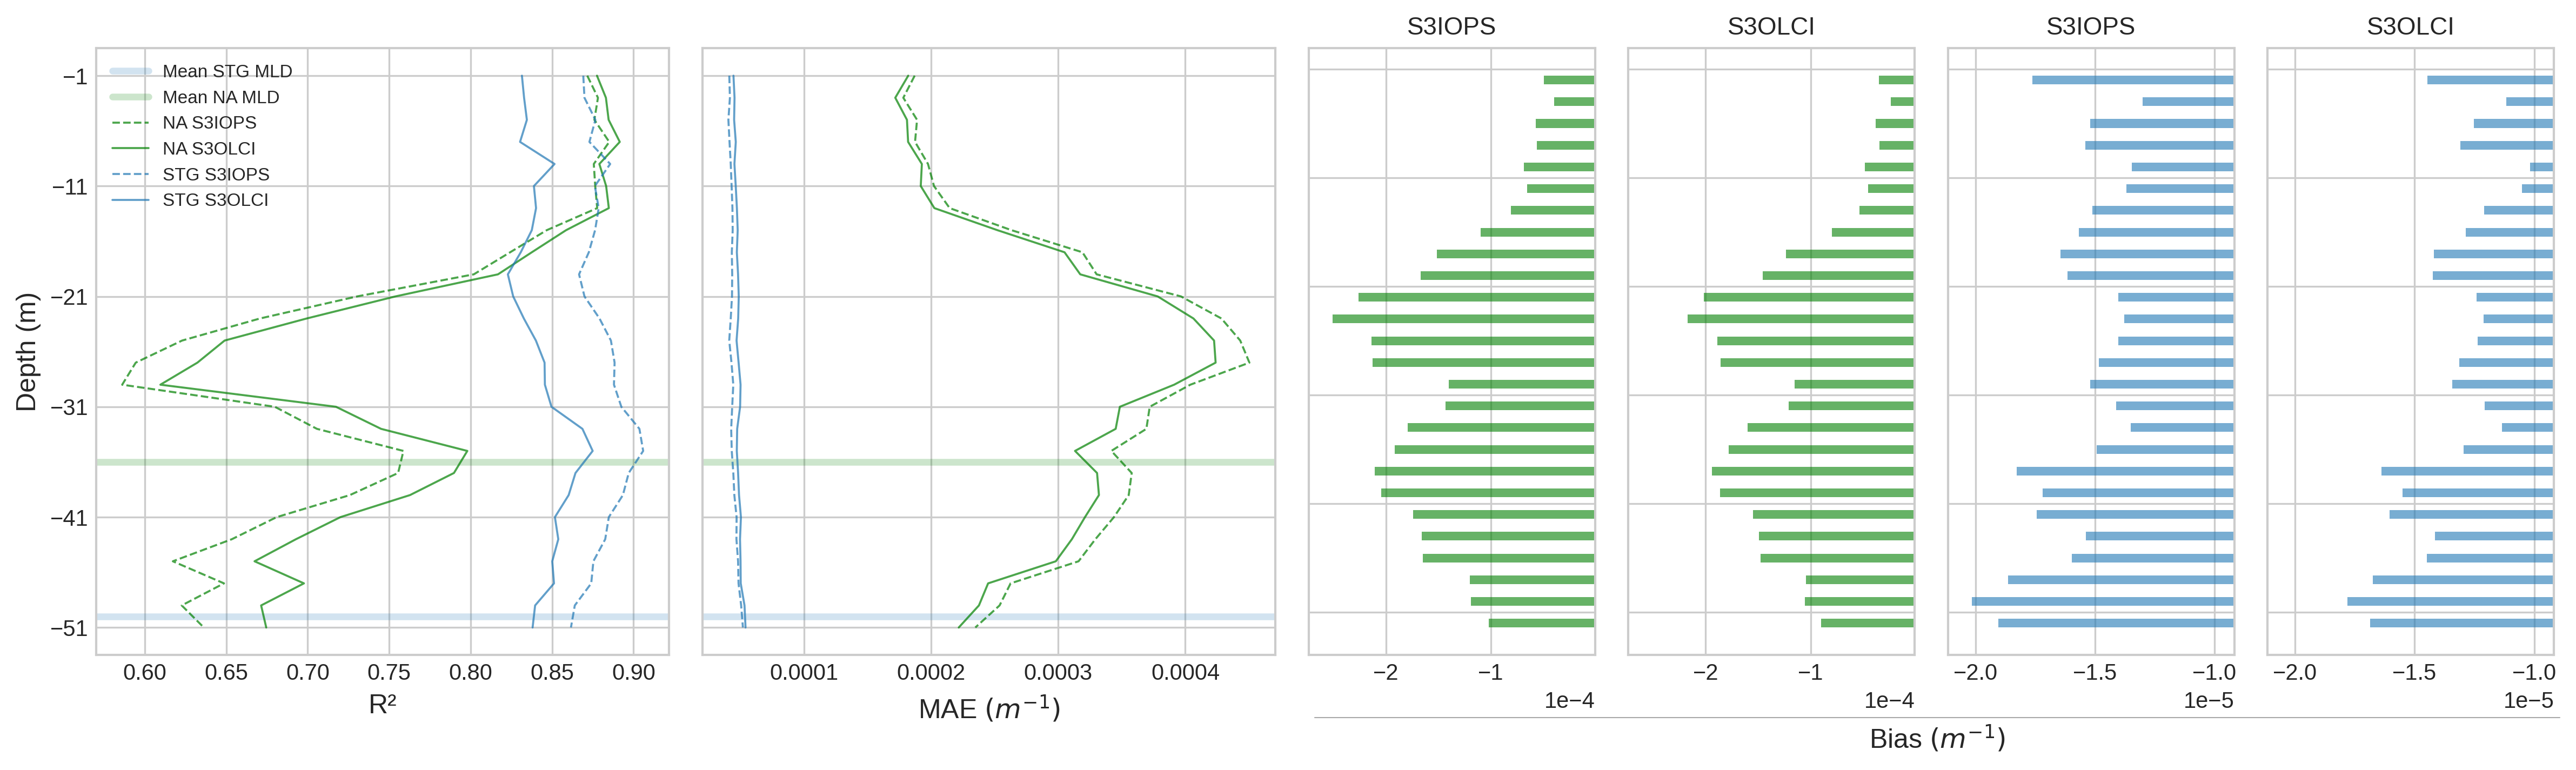

In [220]:
fig, axes = plt.subplots(1, 6, figsize=(16, 5), dpi=300, gridspec_kw={'width_ratios': [1, 1, 0.5, 0.5,0.5, 0.5]}, sharey=False)

# --- R² Plot ---
ax = axes[0]
ax.axhline(y=-50, color=colors['STG'], linewidth=3, alpha=0.2, label='Mean STG MLD')
ax.axhline(y=-36, color=colors['NA'], linewidth=3, alpha=0.2,label='Mean NA MLD')

ax.plot(r2_50sat["NA_S3IOPS"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="--", linewidth=0.9, label="NA S3IOPS")
ax.plot(r2_50sat["NA_S3OLCI"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="-", linewidth=0.9, label="NA S3OLCI")
ax.plot(r2_50sat["STG_S3IOPS"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="--", linewidth=0.9, label="STG S3IOPS")
ax.plot(r2_50sat["STG_S3OLCI"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="-", linewidth=0.9, label="STG S3OLCI")

ax.set_xlabel("R\u00B2", fontsize=12)
ax.set_ylabel("Depth (m)", fontsize=12)
ax.set_yticks(yticks)
ax.tick_params(labelsize=10)
ax.legend(fontsize=8)

# --- MAE Plot ---
ax = axes[1]
ax.axhline(y=-50, color=colors['STG'], linewidth=3, alpha=0.2)
ax.axhline(y=-36, color=colors['NA'], linewidth=3, alpha=0.2)
ax.set_yticklabels([])
ax.plot(mae_50sat["NA_S3IOPS"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="--", linewidth=0.9)
ax.plot(mae_50sat["NA_S3OLCI"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="-", linewidth=0.9)
ax.plot(mae_50sat["STG_S3IOPS"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="--", linewidth=0.9)
ax.plot(mae_50sat["STG_S3OLCI"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="-", linewidth=0.9)
ax.set_yticks(yticks)
ax.set_xlabel("MAE $(m^{-1})$", fontsize=12)
ax.tick_params(labelsize=10)
axes[1].xaxis.set_major_formatter(formatter)

ax = axes[2]
ax.barh(depth_range, bias_50sat["NA_S3IOPS"], color=colors['NA'], alpha=0.6)
#ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.invert_yaxis()
ax.axvline(x=0, color='darkgrey', linestyle='--', linewidth=1)
ax.tick_params(labelsize=10)
ax.set_title("S3IOPS", fontsize=11)
axes[2].xaxis.set_major_formatter(formatter)

ax = axes[3]
ax.barh(depth_range, bias_50sat["NA_S3OLCI"], color=colors['NA'], alpha=0.6)
#ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.invert_yaxis()
ax.axvline(x=0, color='darkgrey', linestyle='--', linewidth=1)
ax.tick_params(labelsize=10)
ax.set_title("S3OLCI", fontsize=11)
axes[3].xaxis.set_major_formatter(formatter)


ax = axes[4]
ax.barh(depth_range, bias_50sat["STG_S3IOPS"], color=colors['STG'], alpha=0.6)
#ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.invert_yaxis()
ax.axvline(x=0, color='darkgrey', linestyle='--', linewidth=1)
ax.tick_params(labelsize=10)
ax.set_title("S3IOPS", fontsize=11)


ax = axes[5]
ax.barh(depth_range, bias_50sat["STG_S3OLCI"], color=colors['STG'], alpha=0.6)
#ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.invert_yaxis()
ax.axvline(x=0, color='darkgrey', linestyle='--', linewidth=1)
ax.tick_params(labelsize=10)
ax.set_title("S3OLCI", fontsize=11)


na_bias_values = np.concatenate([
    bias_50sat["NA_S3IOPS"],
    bias_50sat["NA_S3OLCI"]
])
na_bias_min = na_bias_values.min()
na_bias_max = na_bias_values.max()

# Add small margin
margin = 0.1 * (na_bias_max - na_bias_min)
xlim_na = (na_bias_min - margin, na_bias_max + margin)

axes[2].set_xlim(xlim_na)
axes[3].set_xlim(xlim_na)

stg_bias_values = np.concatenate([
    bias_50sat["STG_S3IOPS"],
    bias_50sat["STG_S3OLCI"]
])
stg_bias_min = stg_bias_values.min()
stg_bias_max = stg_bias_values.max()

margin = 0.1 * (stg_bias_max - stg_bias_min)
xlim_stg = (stg_bias_min - margin, stg_bias_max + margin)

axes[4].set_xlim(xlim_stg)
axes[5].set_xlim(xlim_stg)

fig.supxlabel('Bias $(m^{-1})$', fontsize=12, x=0.75, y = 0.060) 

line_y = 0.105  # same y as supxlabel
line_x_start = 0.51  # adjust based on figure layout (left side of bias plots)
line_x_end = 0.99   # adjust based on figure layout (right side of bias plots)

# Use Figure coordinates to draw a horizontal line
fig.add_artist(plt.Line2D([line_x_start, line_x_end], [line_y, line_y],
                          transform=fig.transFigure,
                          color='darkgrey', linewidth=0.5))

plt.tight_layout()
plt.savefig(f"../results/Comparisons/{depth}/Comparison_{depth}_R2_MAE_Bias_sat.pdf")
plt.show()